In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [4]:
# morfolojik işlemler : siyah-beyaz (binary) görüntüler üzerinde gmrüntünün yapısal özelliklerinin değiştirilmesine yarayan işlemler bütünüdür.

# 4 temel morfolojik işlem vardır:
# erosion (aşındırma) dilaton (genişletme) opening (açma) closing (kapama)
print(os.getcwd())
my_binary_img = cv2.imread('../Assets/art.png',0)
print(my_binary_img.shape)
print(type(my_binary_img))

c:\Users\mehme\Desktop\Selo\Ders Notları\Görüntü İşleme\Python
(316, 512)
<class 'numpy.ndarray'>


In [5]:
# morfolojik işlemleri yerine getirmek için bize lazım olan kernel matrisini oluşturuyoruz.Bu matris 5x5lik ve tamamen int tipinde 1 değerinden
# oluşacaktır.Bunun sebebi erosion (aşındırma) işleminde,bu matrisin kapladığı tüm alan 255 ya da 1 değerinfen oluşuyorsa o zaman o değer
# sabit kalacak. Akasi halde,o piksel siyah değerini alıcaktır.

my_kernel = np.ones((5,5),dtype=np.uint8)

In [8]:
my_erosion_img = cv2.erode(my_binary_img,my_kernel,iterations=6)

(np.float64(-0.5), np.float64(511.5), np.float64(315.5), np.float64(-0.5))

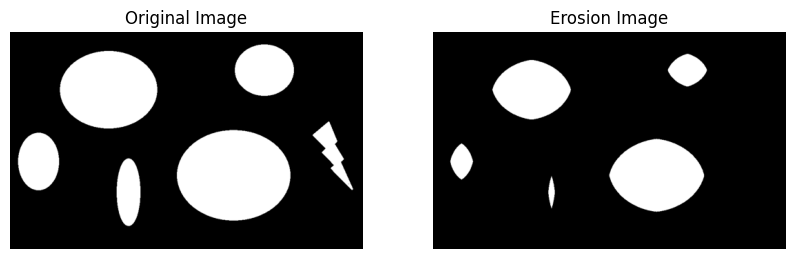

In [9]:
fig = plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.imshow(my_binary_img,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(my_erosion_img,cmap='gray')
plt.title('Erosion Image')
plt.axis('off')

In [11]:
# dilation (genişletme) işlemi : erosion işleminin tam tersi olarak çalışır. 
# Yani kernel matrisinin kapladığı alanda 1 değeri varsa o zaman o piksel değeri 1 olarak kalır. Aksi halde o piksel değeri 0 olur.
my_dilation_img = cv2.dilate(my_binary_img,my_kernel,iterations=6)

(np.float64(-0.5), np.float64(511.5), np.float64(315.5), np.float64(-0.5))

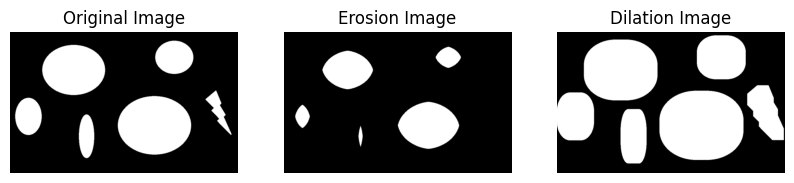

In [12]:
fig = plt.figure(figsize=(10,7))

plt.subplot(1,3,1)
plt.imshow(my_binary_img,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(my_erosion_img,cmap='gray')
plt.title('Erosion Image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(my_dilation_img,cmap='gray')
plt.title('Dilation Image')
plt.axis('off')

In [33]:
new_img =  cv2.imread('../Assets/lisbeth.png',0)
print(type(new_img))

<class 'numpy.ndarray'>


In [18]:
new_img.shape

(316, 512, 3)

In [19]:
white_noise = np.random.randint(0,2,size=new_img.shape[:2])
white_noise *= 255

(np.float64(-0.5), np.float64(511.5), np.float64(315.5), np.float64(-0.5))

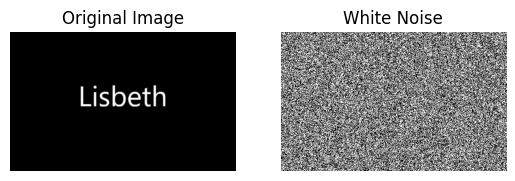

In [36]:
plt.subplot(1,2,1)
plt.imshow(new_img,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(white_noise,cmap='gray')
plt.title('White Noise')
plt.axis('off')

Text(0.5, 1.0, 'Noised Image')

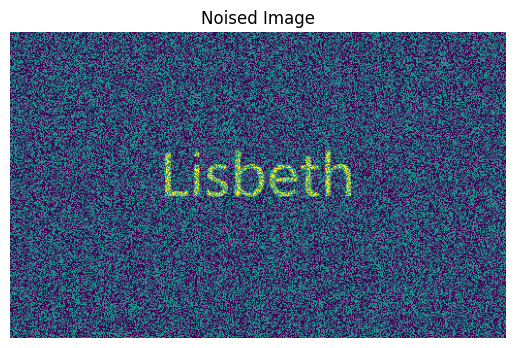

In [37]:

my_noised_img = white_noise + new_img
plt.imshow(my_noised_img)
plt.axis('off')
plt.title('Noised Image')

In [31]:
my_opening_img = cv2.morphologyEx(my_noised_img.astype(np.float32), cv2.MORPH_OPEN, my_kernel)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..253.0].


(np.float64(-0.5), np.float64(511.5), np.float64(315.5), np.float64(-0.5))

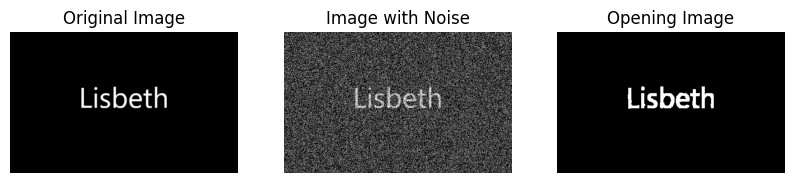

In [39]:
fig = plt.figure(figsize=(10,7))

plt.subplot(1,3,1)
plt.imshow(new_img,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(my_noised_img,cmap='gray')
plt.title('Image with Noise')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(my_opening_img,cmap='gray')
plt.title('Opening Image')
plt.axis('off')

In [40]:
# closing (kapama) işlemi : açma işleminin tam tersi olarak çalışır.
# gürültülerde (mat görünümlerde) oldukça işe yarar.

black_noise = np.random.randint(0,2,size=new_img.shape[:2])
black_noise *= -255


In [41]:
my_black_noised_img = black_noise + new_img


Text(0.5, 1.0, 'Black Noised Image')

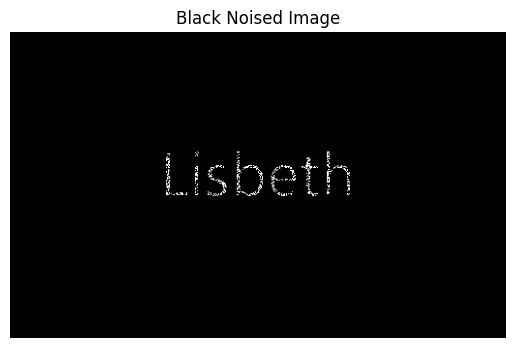

In [43]:
my_black_noised_img[my_black_noised_img <= 245] = 0

plt.imshow(my_black_noised_img,cmap='gray')
plt.axis('off')
plt.title('Black Noised Image')


In [45]:
my_closing_img = cv2.morphologyEx(my_black_noised_img.astype(np.float32), cv2.MORPH_CLOSE, my_kernel)

(np.float64(-0.5), np.float64(511.5), np.float64(315.5), np.float64(-0.5))

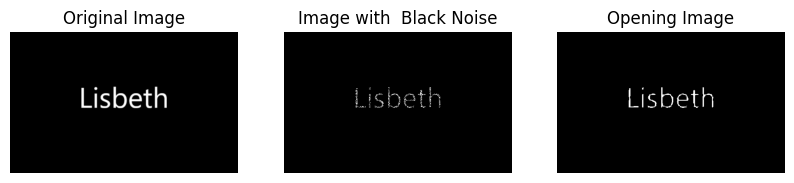

In [46]:
fig = plt.figure(figsize=(10,7))

plt.subplot(1,3,1)
plt.imshow(new_img,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(my_black_noised_img,cmap='gray')
plt.title('Image with  Black Noise')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(my_closing_img,cmap='gray')
plt.title('Opening Image')
plt.axis('off')

In [47]:
# Gradient yöntemiyle kenar tespiti.Görüntü işlemede gradient: bir pikselden diğer bir piksele geçerken değişimin yoğunluğunu ifade eder
# pikseller arasında büyük bir fakr varsa, yoğunluk fazla olur ve kenarlar bu şekilde tespit edilir.

my_gradient_1 = cv2.morphologyEx(my_binary_img,cv2.MORPH_GRADIENT,my_kernel)
my_gradient_2 = cv2.morphologyEx(new_img,cv2.MORPH_GRADIENT,my_kernel)


(np.float64(-0.5), np.float64(511.5), np.float64(315.5), np.float64(-0.5))

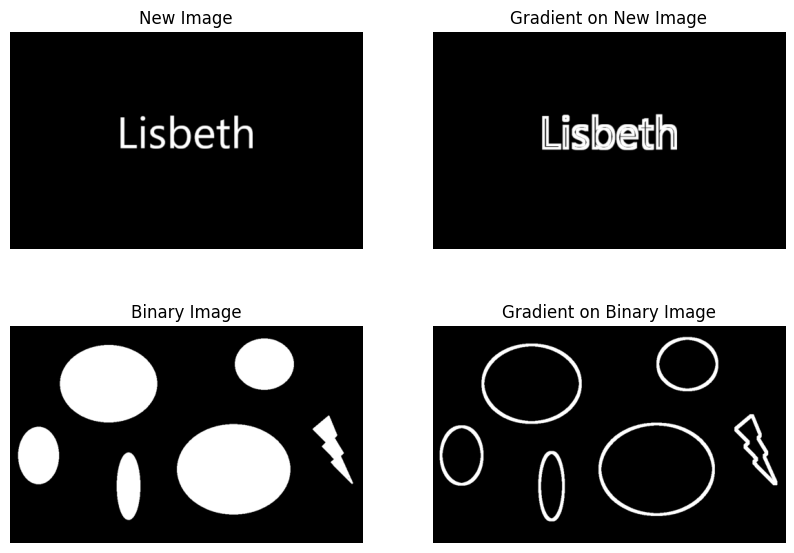

In [48]:
fig = plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
plt.imshow(new_img,cmap='gray')
plt.title('New Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(my_gradient_2,cmap='gray')
plt.title('Gradient on New Image')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(my_binary_img,cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(my_gradient_1,cmap='gray')
plt.title('Gradient on Binary Image')
plt.axis('off')

